In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('creditcard.csv.zip')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.dtypes.value_counts()

,count
float64,30
int64,1


**Checklist de base **
Analyse de forme


* Variable target :
* ligne et colonne :284807, 31
* types de variables : 30
* Analyse des valeurs manquantes :Aucune valeurs manquantes
Algorithmes de Machine Learning sont sensibles au valeurs extrêmes ou abérantes

In [10]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [13]:
# Calcul des quartiles et de l'IQR (écart interquartile)
Q1 = df['V1'].quantile(0.25)
Q3 = df['V1'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites pour détecter les outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les outliers
outliers = df[(df['V1'] < lower_bound) | (df['V1'] > upper_bound)]
print(f"Nombre de valeurs aberrantes : {len(outliers)}")

Nombre de valeurs aberrantes : 7062


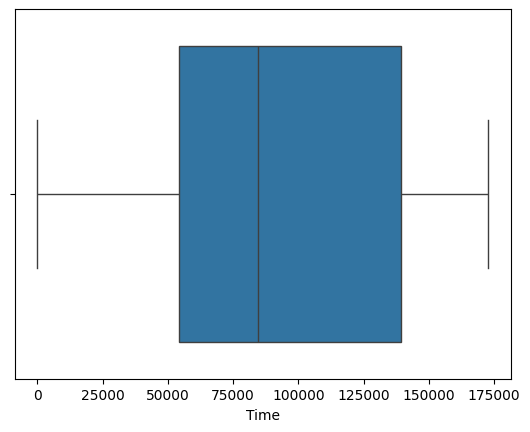

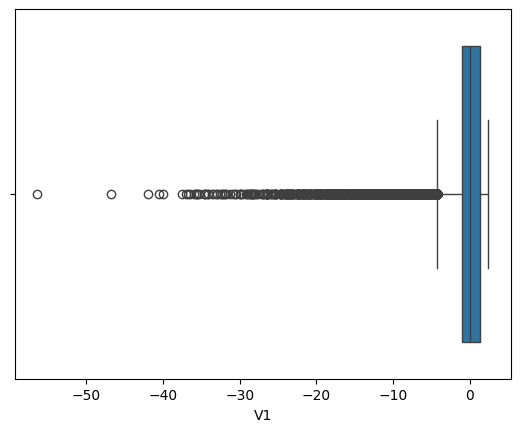

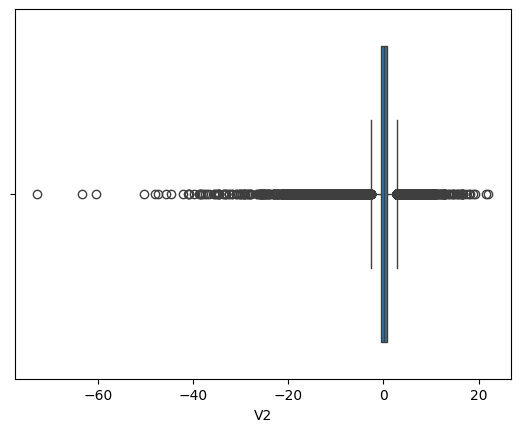

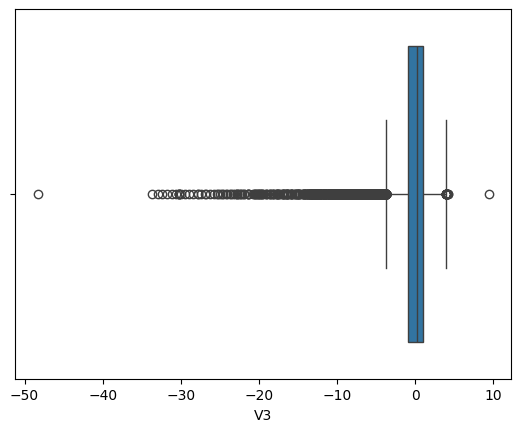

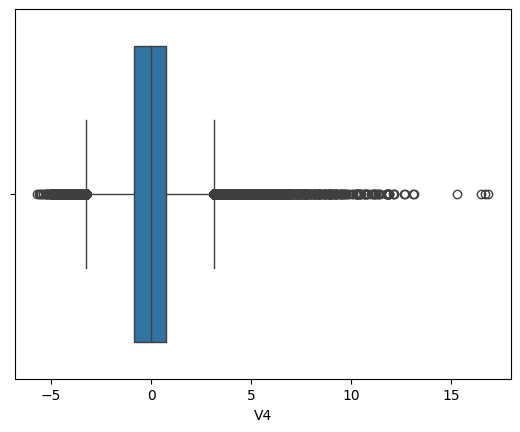

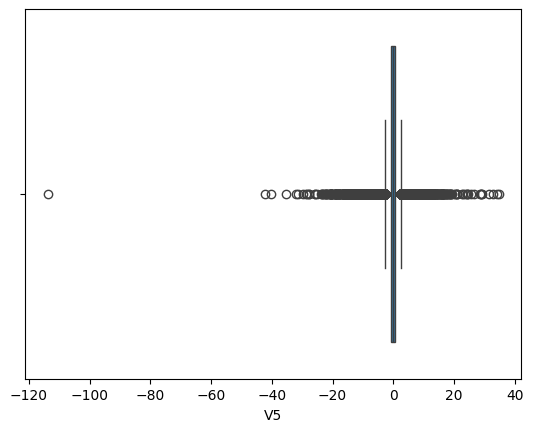

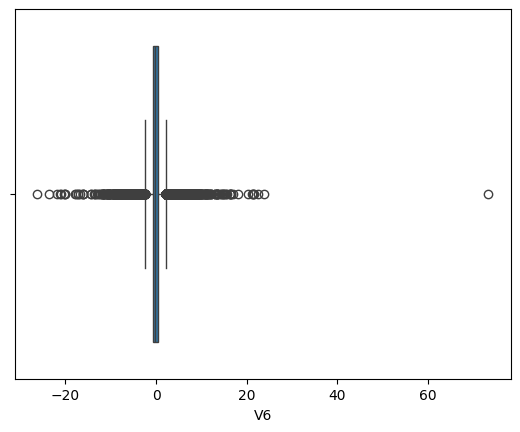

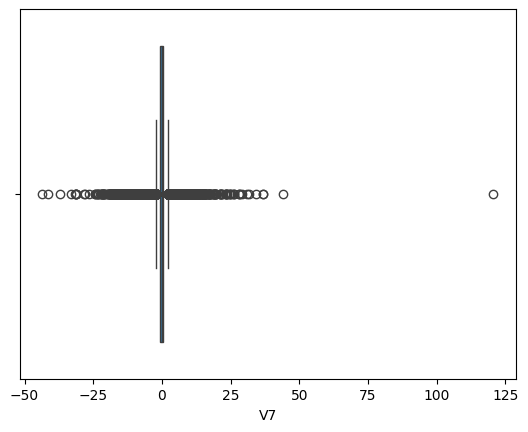

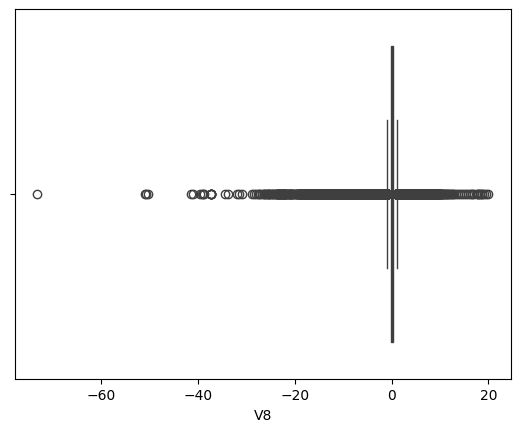

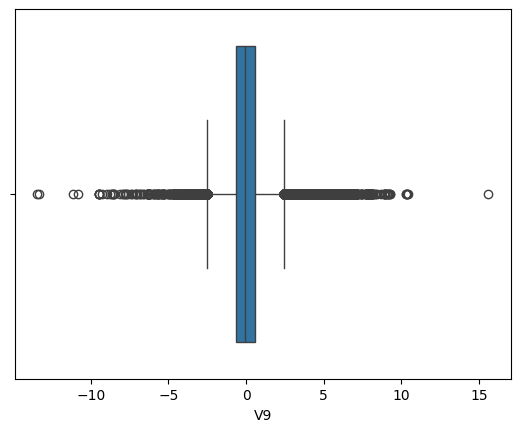

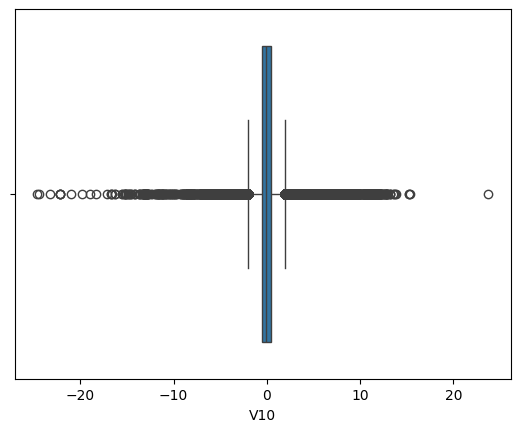

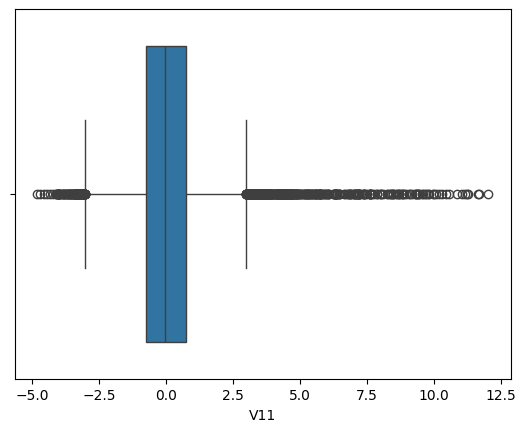

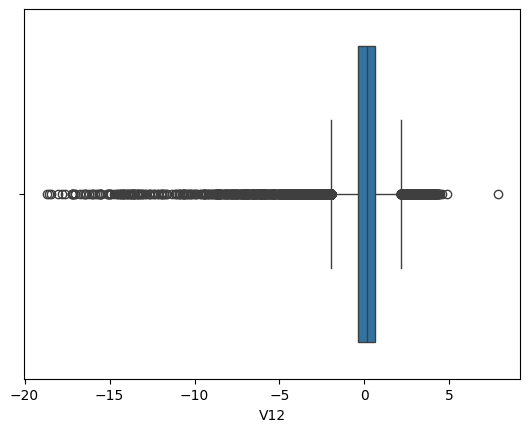

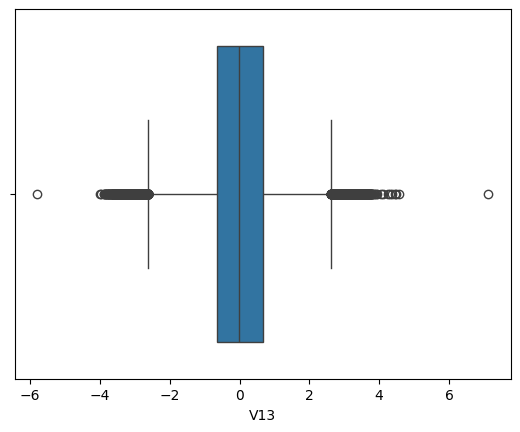

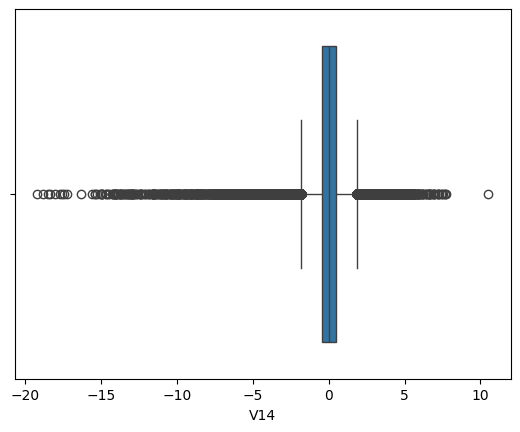

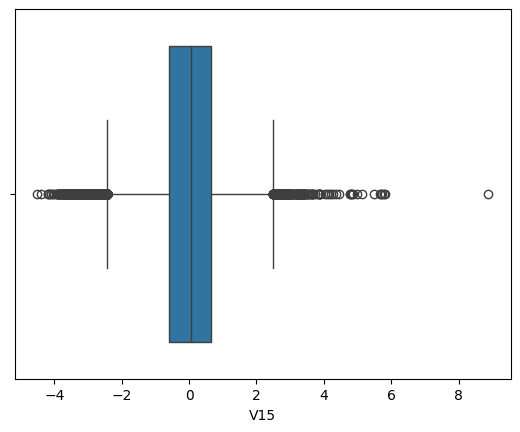

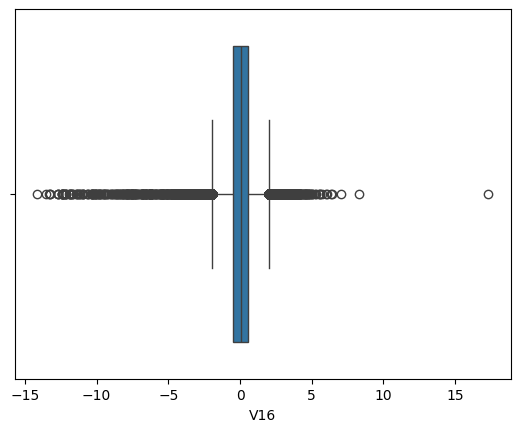

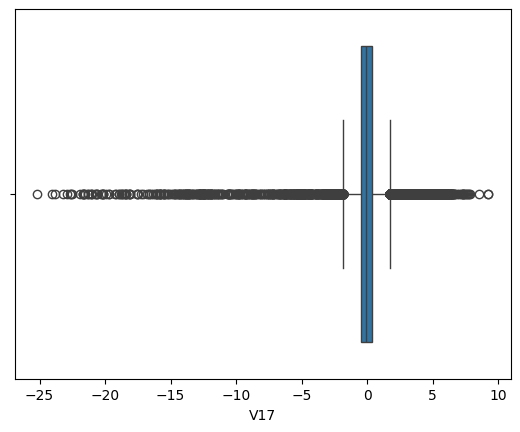

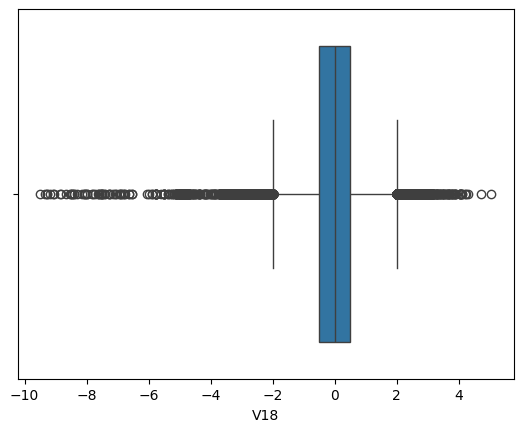

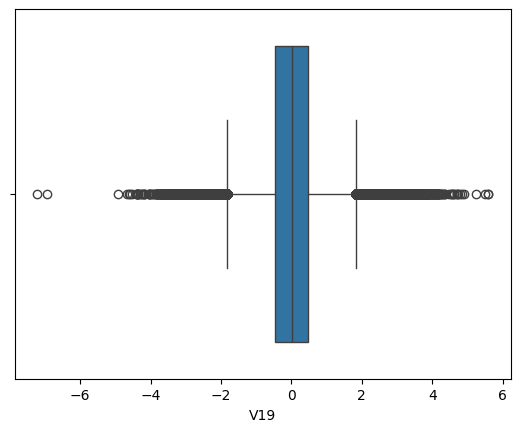

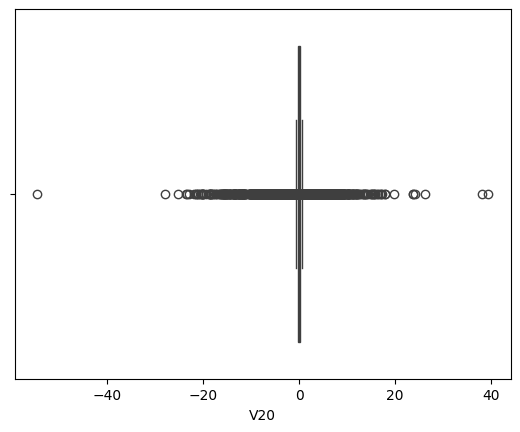

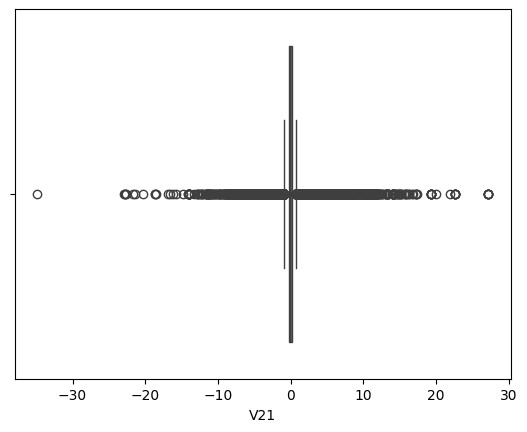

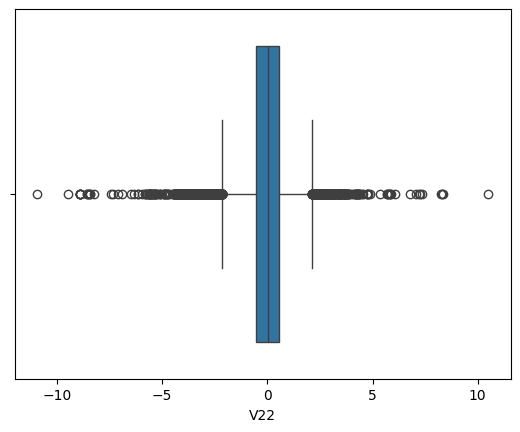

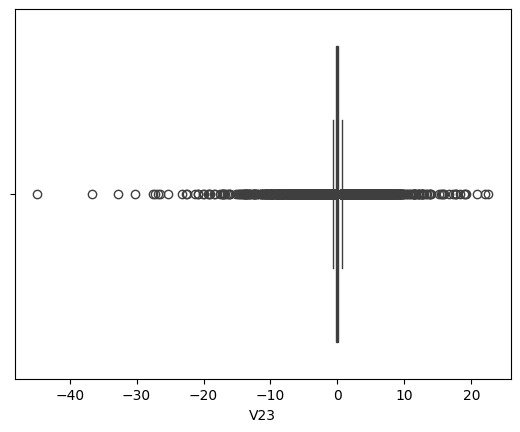

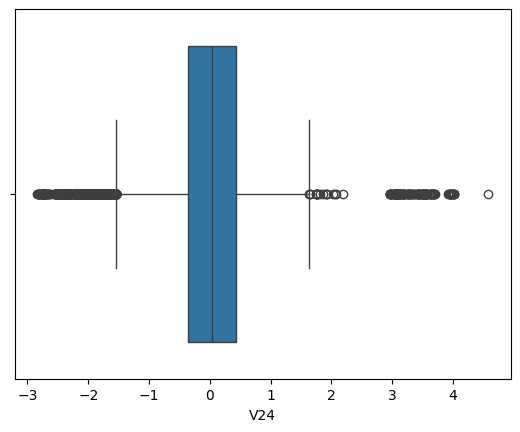

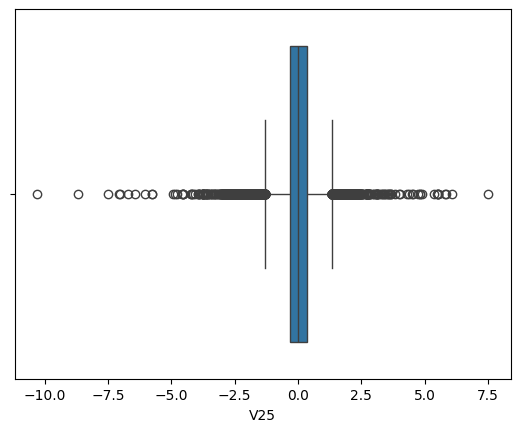

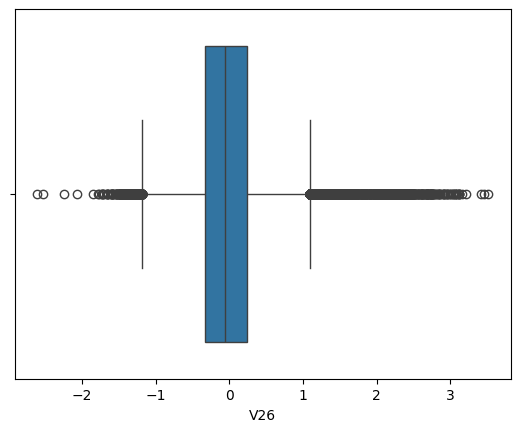

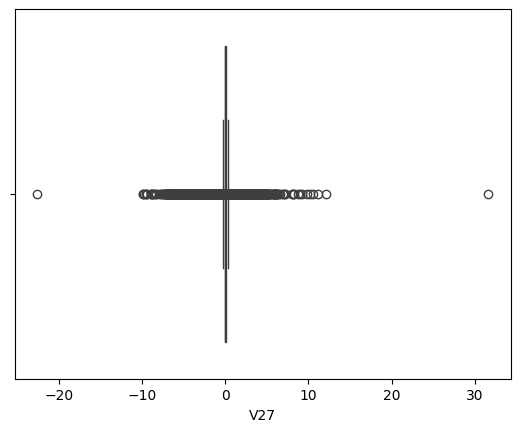

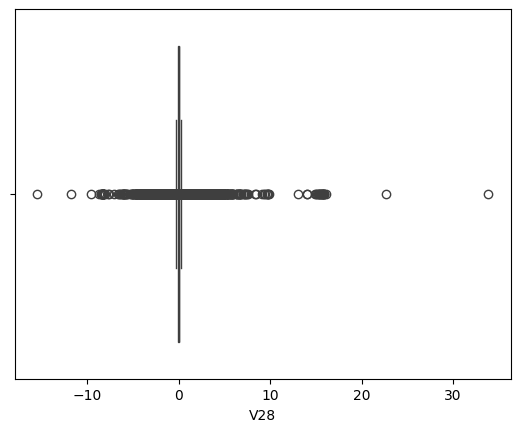

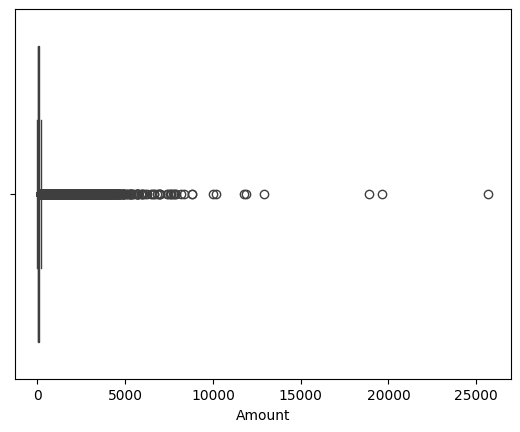

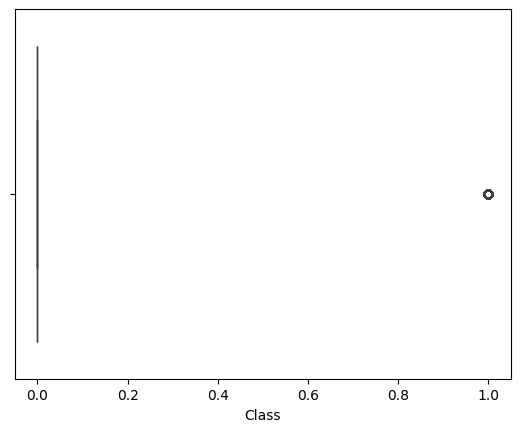

In [10]:
  # visualisation des outliers
  for col in df.select_dtypes(include=['number']).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [23]:
# Application de la technique de winsorisation pour limiter l'impact des valeurs abérantes
for i in df.select_dtypes(exclude=["object"]).columns:
    df[i].clip(lower=df[i].quantile(0.05), upper=df[i].quantile(0.95), inplace=True)

<ipython-input-23-9ab854baedf8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].clip(lower=df[i].quantile(0.05), upper=df[i].quantile(0.95), inplace=True)
<ipython-input-23-9ab854baedf8>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

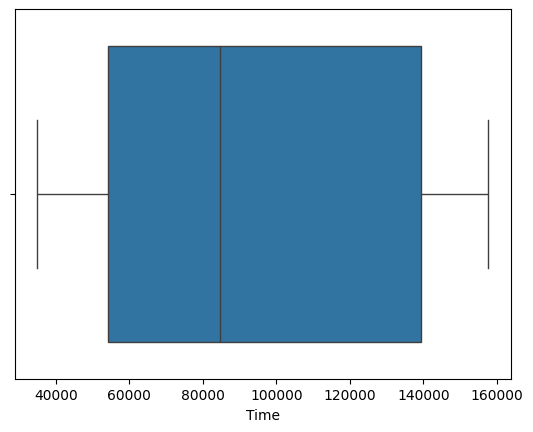

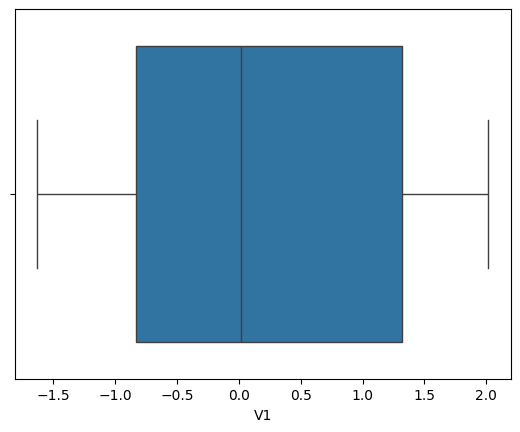

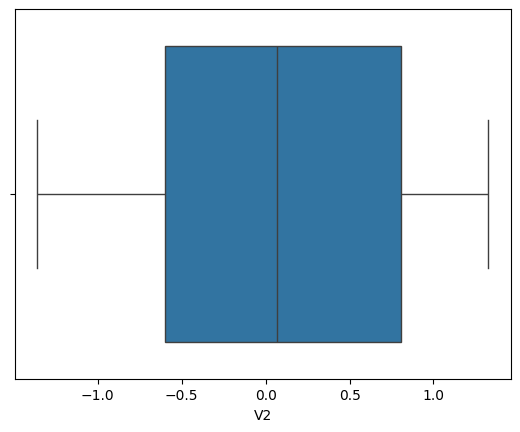

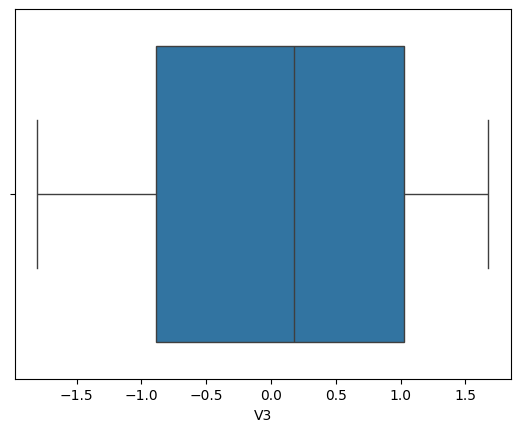

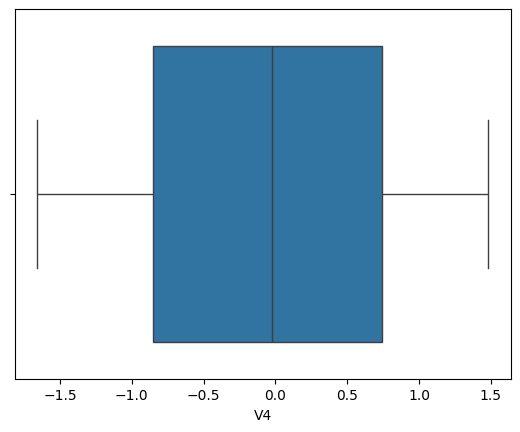

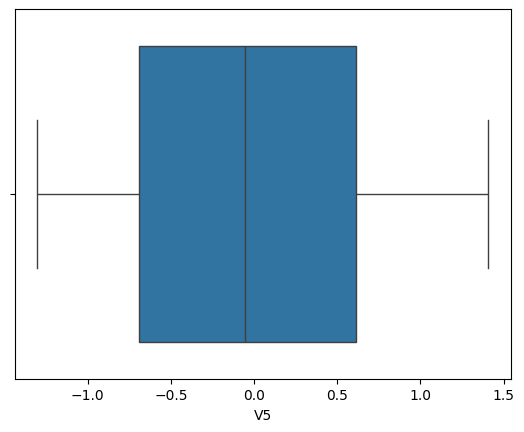

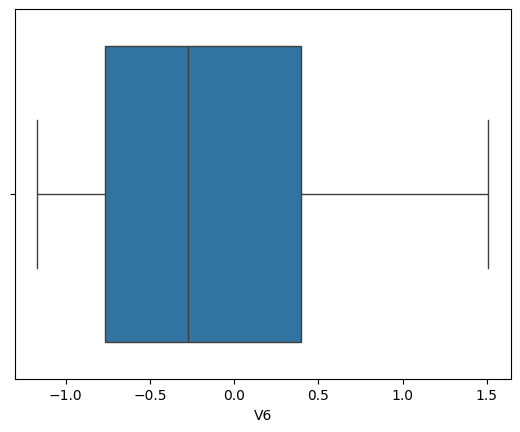

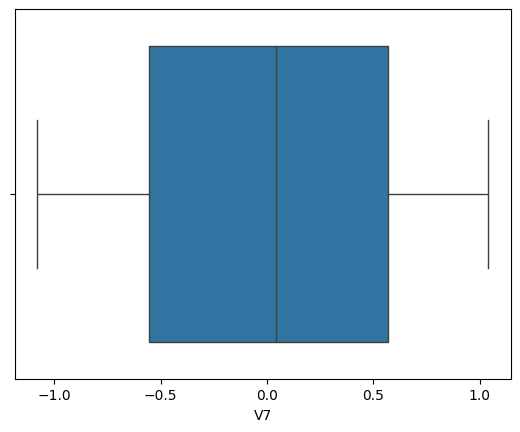

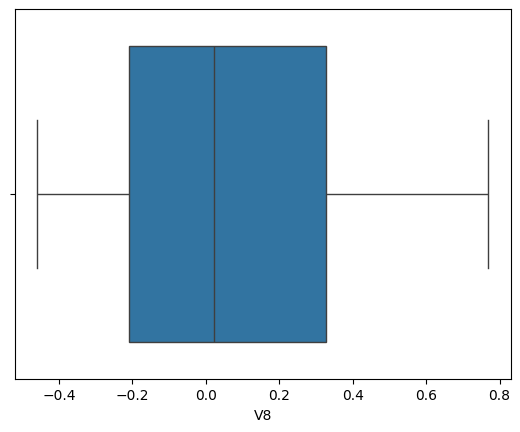

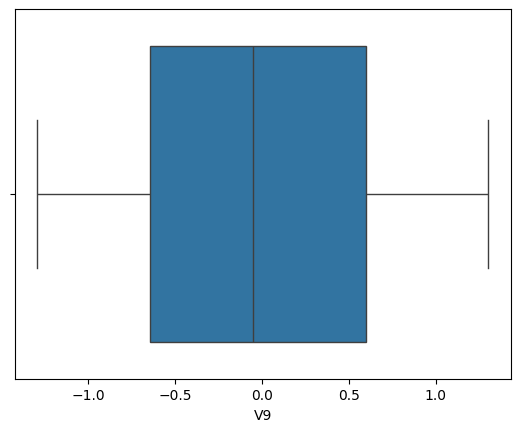

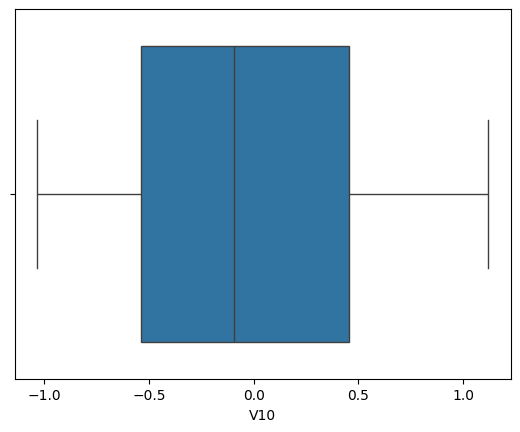

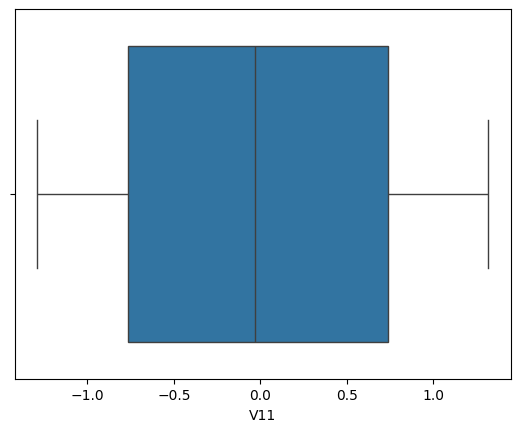

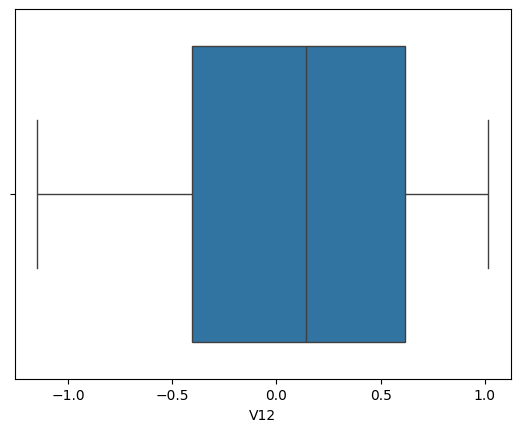

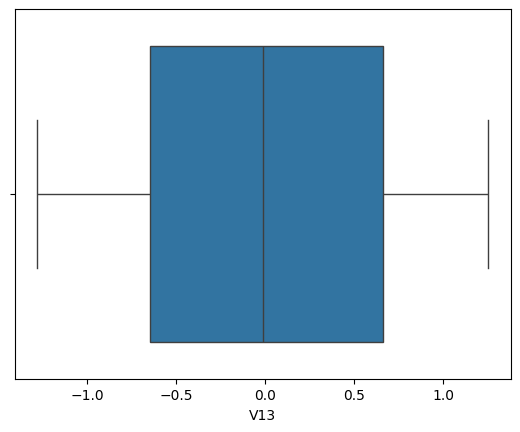

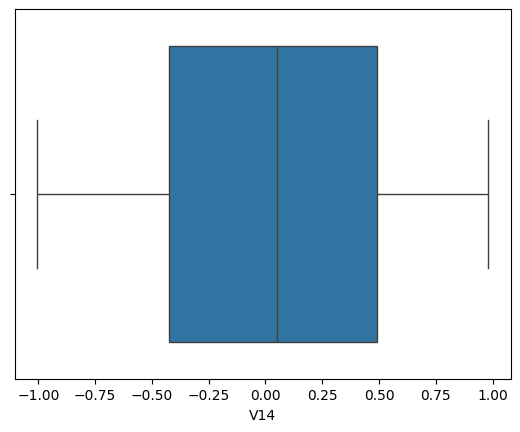

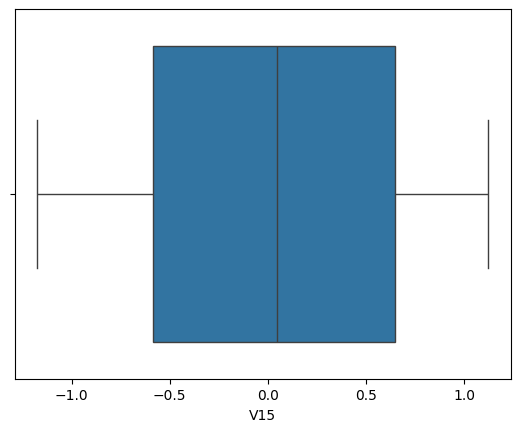

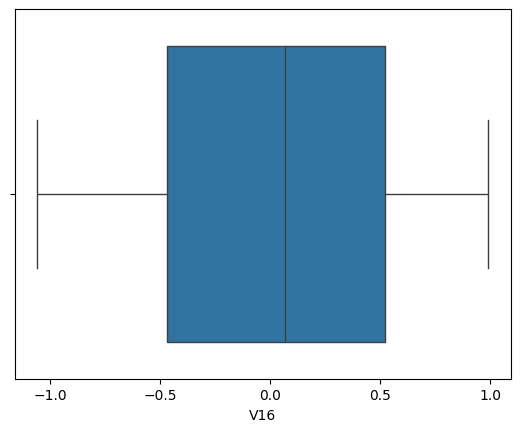

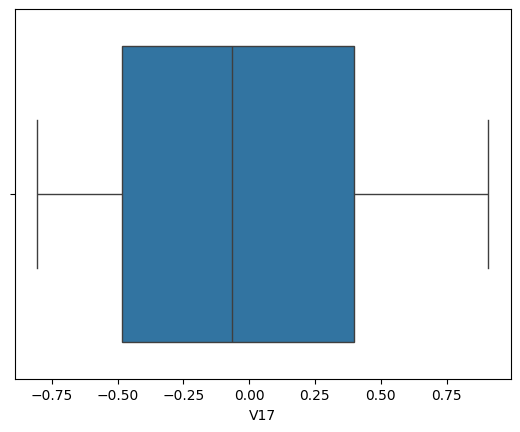

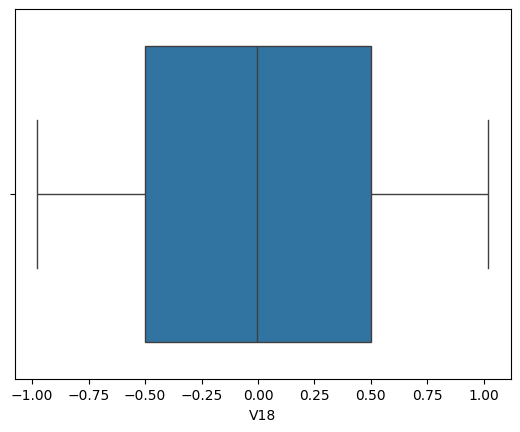

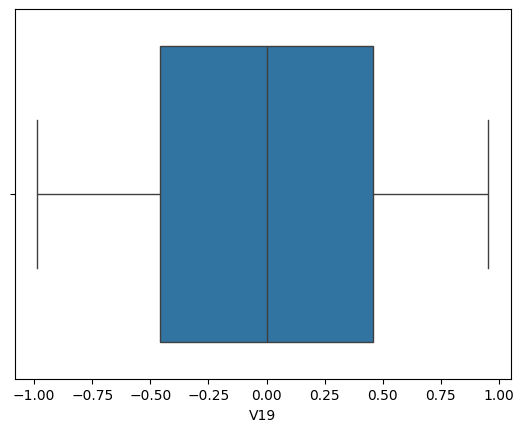

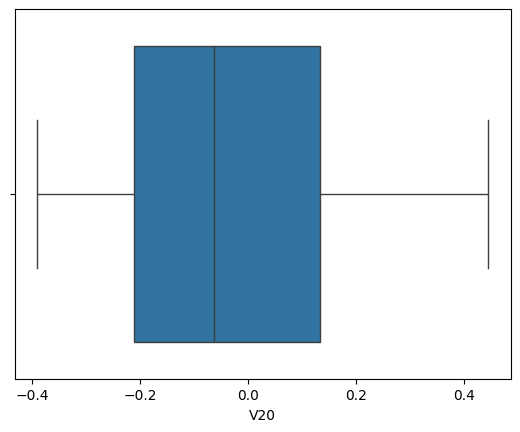

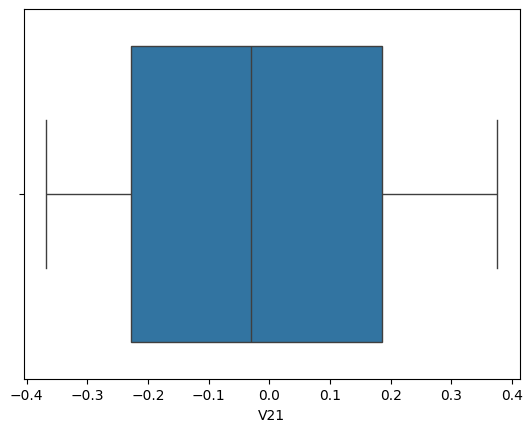

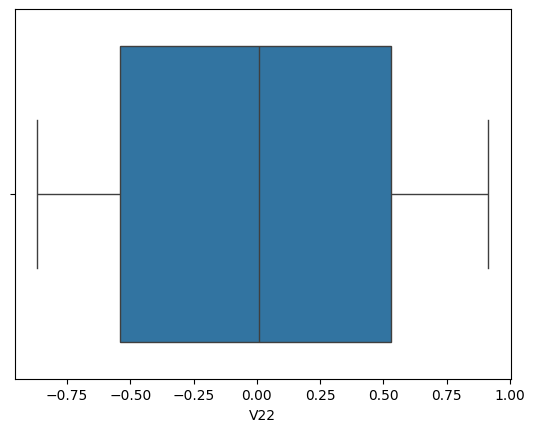

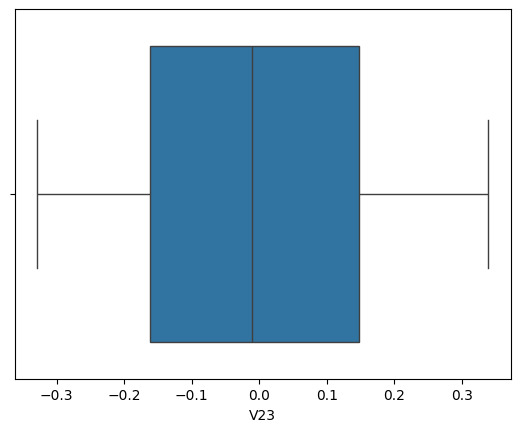

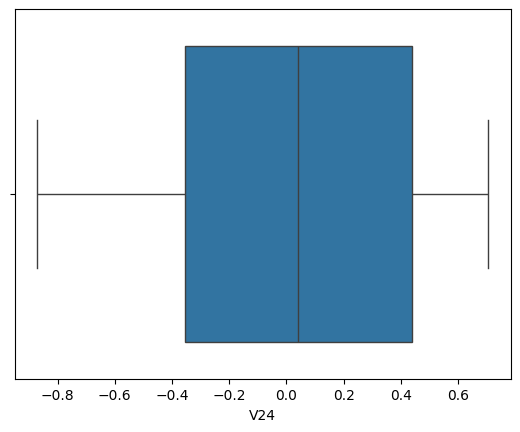

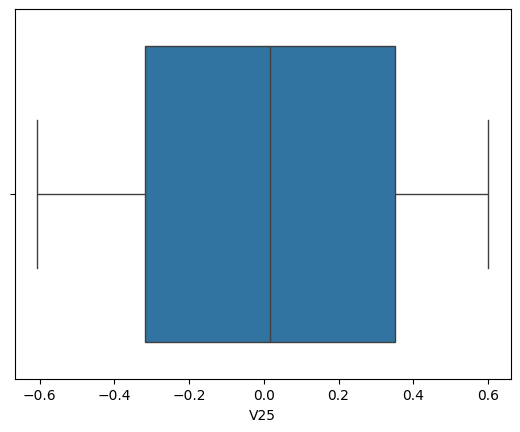

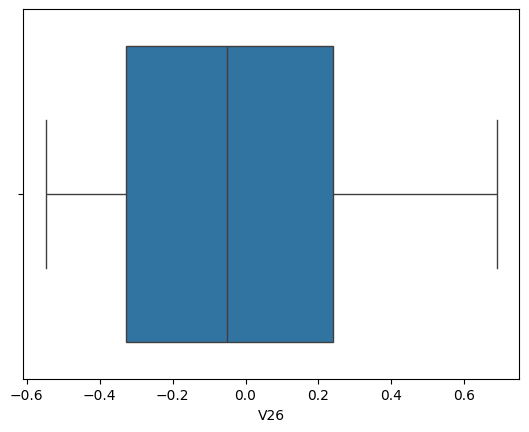

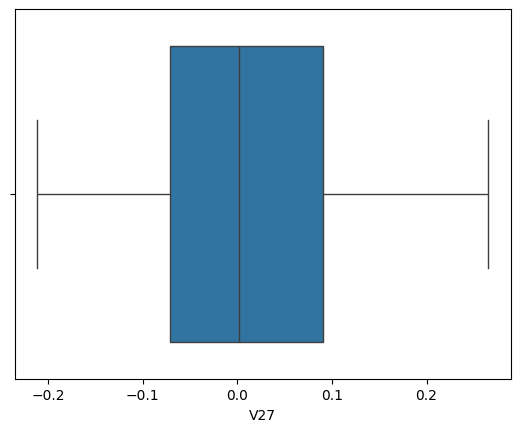

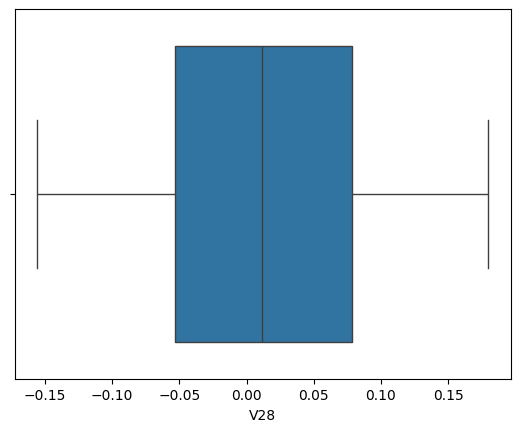

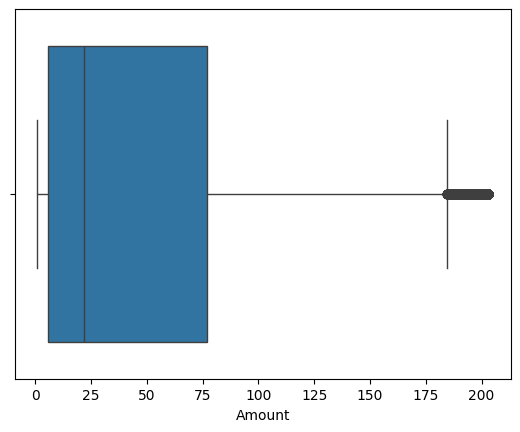

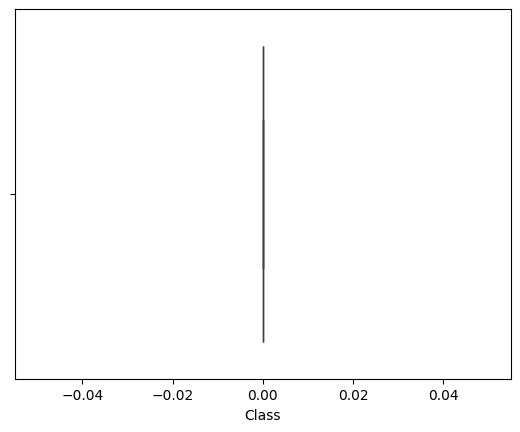

In [24]:
for col in df.select_dtypes(exclude=["object"]).columns:
    sns.boxplot(x=df[col])
    plt.show()

In [28]:
# utilisation de la methode MinMaxScaler pour normaliser les données
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Sélection des colonnes à normaliser
columns_to_normalize = [col for col in df.columns if col.startswith('V')]
columns_to_normalize.append('Amount')

# Initialisation du scaler
scaler = MinMaxScaler()

# Application du Min-Max Scaling
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
print("Données normalisées :")
print(df[columns_to_normalize].head())

Données normalisées :
         V4        V5        V6        V7        V8        V9       V10  \
0  0.313023  0.763439  0.267669  0.266815  0.786444  0.475312  0.510600   
1  0.271796  0.766120  0.262192  0.264875  0.786298  0.453981  0.505267   
2  0.268766  0.762329  0.281122  0.270177  0.788042  0.410603  0.513018   
3  0.213661  0.765647  0.275559  0.266803  0.789434  0.414999  0.507585   
4  0.269796  0.762975  0.263984  0.268968  0.782484  0.490950  0.524303   

        V11       V12       V13  ...       V20       V21       V22       V23  \
0  0.252484  0.680908  0.371591  ...  0.582942  0.561184  0.522992  0.663793   
1  0.381188  0.744342  0.486190  ...  0.579530  0.557840  0.480237  0.666938   
2  0.322422  0.706683  0.503854  ...  0.585855  0.565477  0.546030  0.678939   
3  0.271817  0.710910  0.487635  ...  0.578050  0.559734  0.510277  0.662607   
4  0.236355  0.724477  0.552509  ...  0.584615  0.561327  0.547271  0.663392   

        V24       V25       V26       V27     

In [29]:
df = df.drop(df.columns[0], axis=1)
df.head()

,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [36]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Definir notre target 'class'
y = df['Class']
# Definir toutes les autres colonnes comme des features
x = df.drop('Class', axis=1)
# diviser les données en ensembles d'apprentissage et de test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Initialiser l'objet RandomOverSampler
ros = RandomOverSampler(sampling_strategy=1, random_state=42)
# Appliquer l'over-sampling aux données d'entraînement
X_train_overesampled, y_train_overesampled = ros.fit_resample(x_train, y_train)
# créer un nouveau DataFrame avec les données oversamplec
bankdata_oversampled = pd.concat([X_train_overesampled, y_train_overesampled], axis=1)


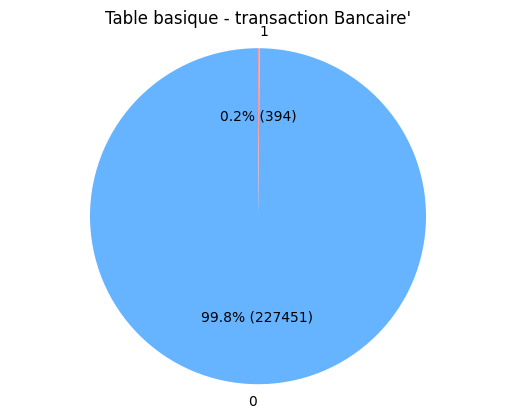

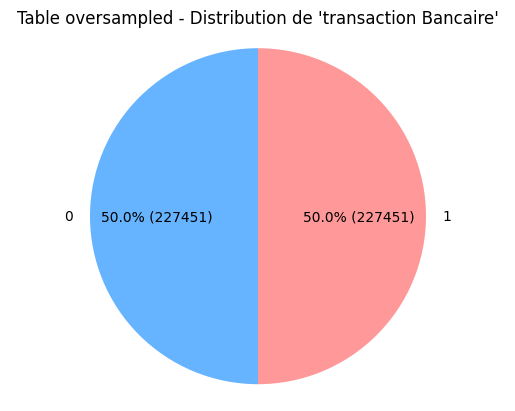

In [38]:
# Fonction pour créer un pie chart avec les proportions et les nombres
def plot_pie_chart(y, title):
    labels = ['0', '1']
    sizes = y.value_counts().values
    colors = ['#66b3ff', '#ff9999']

    # Modifier le format des labels pour inclure les proportions et les nombres
    def autopct_format(pct, all_values):
        absolute = int(round(pct / 100 * sum(all_values)))
        return f"{pct:.1f}% ({absolute})"

    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: autopct_format(pct, sizes), startangle=90)
    ax.axis('equal')  # Pour assurer que le diagramme est bien rond
    plt.title(title)
    plt.show()

# Créer un pie chart pour la table basique
plot_pie_chart(y_train, "Table basique - transaction Bancaire'")

# Créer un pie chart pour la table oversampled
plot_pie_chart(y_train_overesampled, "Table oversampled - Distribution de 'transaction Bancaire'")